**Содержание**:

1. Библиотека streamlit
2. [Создание веб-сервера](https://colab.research.google.com/drive/1wapdcAadltay2dRHMTTjGBzq1sO2AFMU?usp=sharing)

# Создание простого веб-сервера и настройка параметров работы



Добрый день!

Ранее вы изучили различные задачи машинного обучения и виды моделей, позволяющих их решать. Однако до сих пор все эксперименты ограничивались созданием моделей в изолированной среде (Colab или локальный компьютер). Чтобы использовать обученную модель, необходимо обладать навыками программирования, кроме того, запускать модели через скрипты или ноутбуки не очень-то удобно для промышленного применения. В этом уроке будет рассмотрено создание сервиса, который позволит быстро и удобно загружать собственные данные для обработки их нейронной сетью, и способы размещения сервиса в сети.

    План:
    
    1. Создание демонстрационной формы c помощью библиотеки sreamlit
    2. Развертывание демонстрационной формы на бесплатном хостинге

# Создание демонстрационной формы

## Введение в Streamlit

**Streamlit** — это фреймворк с открытым кодом, специально разработанный для инженеров машинного обучения, работающих с **Python**. Он позволяет создавать стильные приложения буквально в несколько строк кода и помогает избежать разработки бэкенда и фронтенда сервиса с нуля.

---
Документация: https://docs.streamlit.io/en/stable/



### Установка

Представленный ниже код будет демонстрировать работу библиотеки **Streamlit** прямо в Google Colaboratory.



Для того, чтобы мы могли протестировать работу библиотеки в Colab, потребуется произвести дополнительные настройки. Дело в том, что мы будем тестировать библиотеку на локальном хосте, но Colab по умолчанию не предоставляет доступ к своей виртуальной машине извне.

Чтобы обойти это, придется выполнить несколько операций:
- скачать специальную утилиту **ngrok**, которая создает туннель для доступа в Colab извне через веб;
- получить ссылку, по которой вы сможете обратиться к виртуальной машине Colab, где будет запускаться ваш код.

P.s. если вас напугали слова "хост", "порт", "туннель", не пугайтесь :-) Просто запустите следующие ячейки:

Для работы с ngrok необходимо пройти процедуру регистрации для получения токена. Выполнити следующие шаги:

1. Перейдите по [ссылке](https://dashboard.ngrok.com/login) и пройдите процедуру регистрации (можно выбрать «*вход с помощью учетной записи Google*»)
2. После авторизации выберите пункт меню **Your Authtoken**
3. Скопируйте Ваш персональный токен


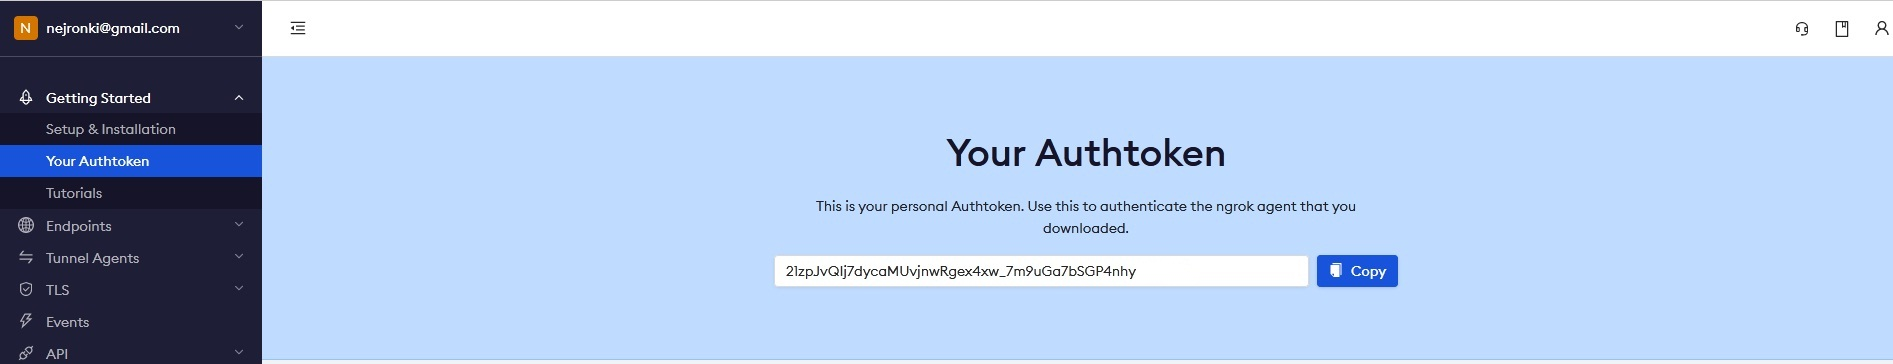

Теперь скачаем дистрибутив ngrok:

In [ ]:
!wget -q https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

In [ ]:
!unzip -q ngrok-stable-linux-amd64.zip

Остался последний шаг: выполним авторизацию в ngrok:

In [ ]:
!./ngrok authtoken xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


Вместо **xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx** укажите свой token, скопированный выше в личном кабинете

In [ ]:
def get_link():
    get_ipython().system_raw('./ngrok http 8501 &')
    !curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Ссылка для streamlit: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

<a name="getlink"></a>
В дальнейшем вам пригодится функция `get_link()`, вызвав которую:

вы получите ссылку для доступа в Colab через веб-браузер из любого места в Сети.

**Замечание**. Иногда при вызове функции вы можете получить ошибку. В этом случае просто перезапустите ячейку еще раз.

Если сейчас перейти по этой ссылке, то вы увидите страницу с ошибкой. Наберитесь терпения и двигайтесь дальше ;-)

In [ ]:
get_link()

Ссылка для streamlit: https://1496-35-196-74-211.ngrok.io


Далее следует установить библиотеку **Streamlit**. Сделать это можно с помощью команды:

In [ ]:
!pip -q install streamlit

     |████████████████████████████████| 10.1 MB 5.1 MB/s 
     |████████████████████████████████| 76 kB 6.4 MB/s 
     |████████████████████████████████| 164 kB 69.3 MB/s 
     |████████████████████████████████| 4.3 MB 47.7 MB/s 
     |████████████████████████████████| 181 kB 65.8 MB/s 
     |████████████████████████████████| 111 kB 57.7 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 130 kB 71.5 MB/s 
     |████████████████████████████████| 428 kB 68.6 MB/s 
     |████████████████████████████████| 130 kB 71.0 MB/s 
     |████████████████████████████████| 793 kB 34.3 MB/s 
     |████████████████████████████████| 1.1 MB 42.3 MB/s 
     |████████████████████████████████| 380 kB 54.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which 

<a name="check"></a>
Проверьте правильность установки, запустив команду:

In [ ]:
!streamlit hello

2022-04-03 21:52:55.207 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  Welcome to Streamlit. Check out our demo in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.196.74.211:8501

  Ready to create your own Python apps super quickly?
  Head over to https://docs.streamlit.io

  May you create awesome apps!


  Stopping...
^C


Теперь у вас есть возможность увидеть инструмент **Streamlit** в действии! Сейчас вы видите работающую ячейку. Не останавливая ее, перейдите по сслыке, которую вы получили с помощью функции `get_link()` [ранее](#getlink).



```
Логика такая: `Streamlit` запускается на локальном хосте (127.0.0.1). 
Но в колабе нельзя получить доступ к локальному хосту. 
Поэтому с помощью утилиты `ngrok` создается специальный туннель к локальному хосту колаба. 

Функции get_link() как раз возвращает ссылку на этот созданный туннель.
Но! После того, как мы останавливаем приложение `Streamlit` в колабе 
(нажимаем на стоп ячейки), туннель закрывается и нужно создавать новый.

```


В новой вкладке браузера вы увидите вот такую страницу:

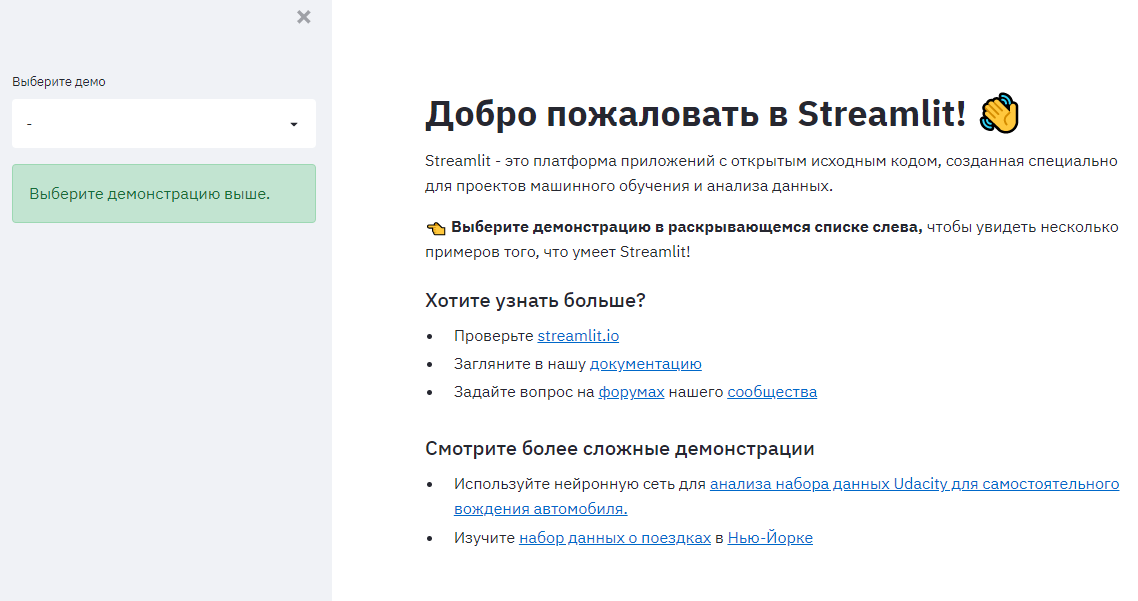

Все работает отлично! Можно двигаться дальше.

Библиотека **Streamlit** имеет широкий функционал и позволяет создавать графики, дашборды и карты, а также красиво визуализировать таблицы Pandas (**DataFrame**).

### Создание первого приложения

Создадим новый файл с названием **helloworld.py** и выполним в нем визуализацию произвольной pandas-таблицы.

**Замечание**. Перед запуском ячейки не забудьте остановить проверочный **Streamlit**. У вас все еще работает предыдущая ячейка! Нужно принудительно остановить ее.

In [ ]:
code = '''
import streamlit as st
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'first column': [1, 2, 3, 4],
    'second column': [10, 20, 30, 40]
})
st.write(df)
'''

with open('helloworld.py', 'w') as f:
    f.write(code)

Прежде чем проверить скрипт, вам снова нужно получить ссылку. Дело в том, что после того, как вы остановили ячейку, соединение с Colab закрылось. Следовательно, нужно открыть его заново:

In [ ]:
get_link()

Ссылка для streamlit: http://37b5-35-196-74-211.ngrok.io


Запустите ваше первое приложение с помощью команды:

In [ ]:
!streamlit run helloworld.py

2022-04-03 21:53:21.051 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.196.74.211:8501

  Stopping...


Перейдите по новой ссылке (полученной с помощью функции `get_link()`). Перед вами созданная скриптом веб-страница:

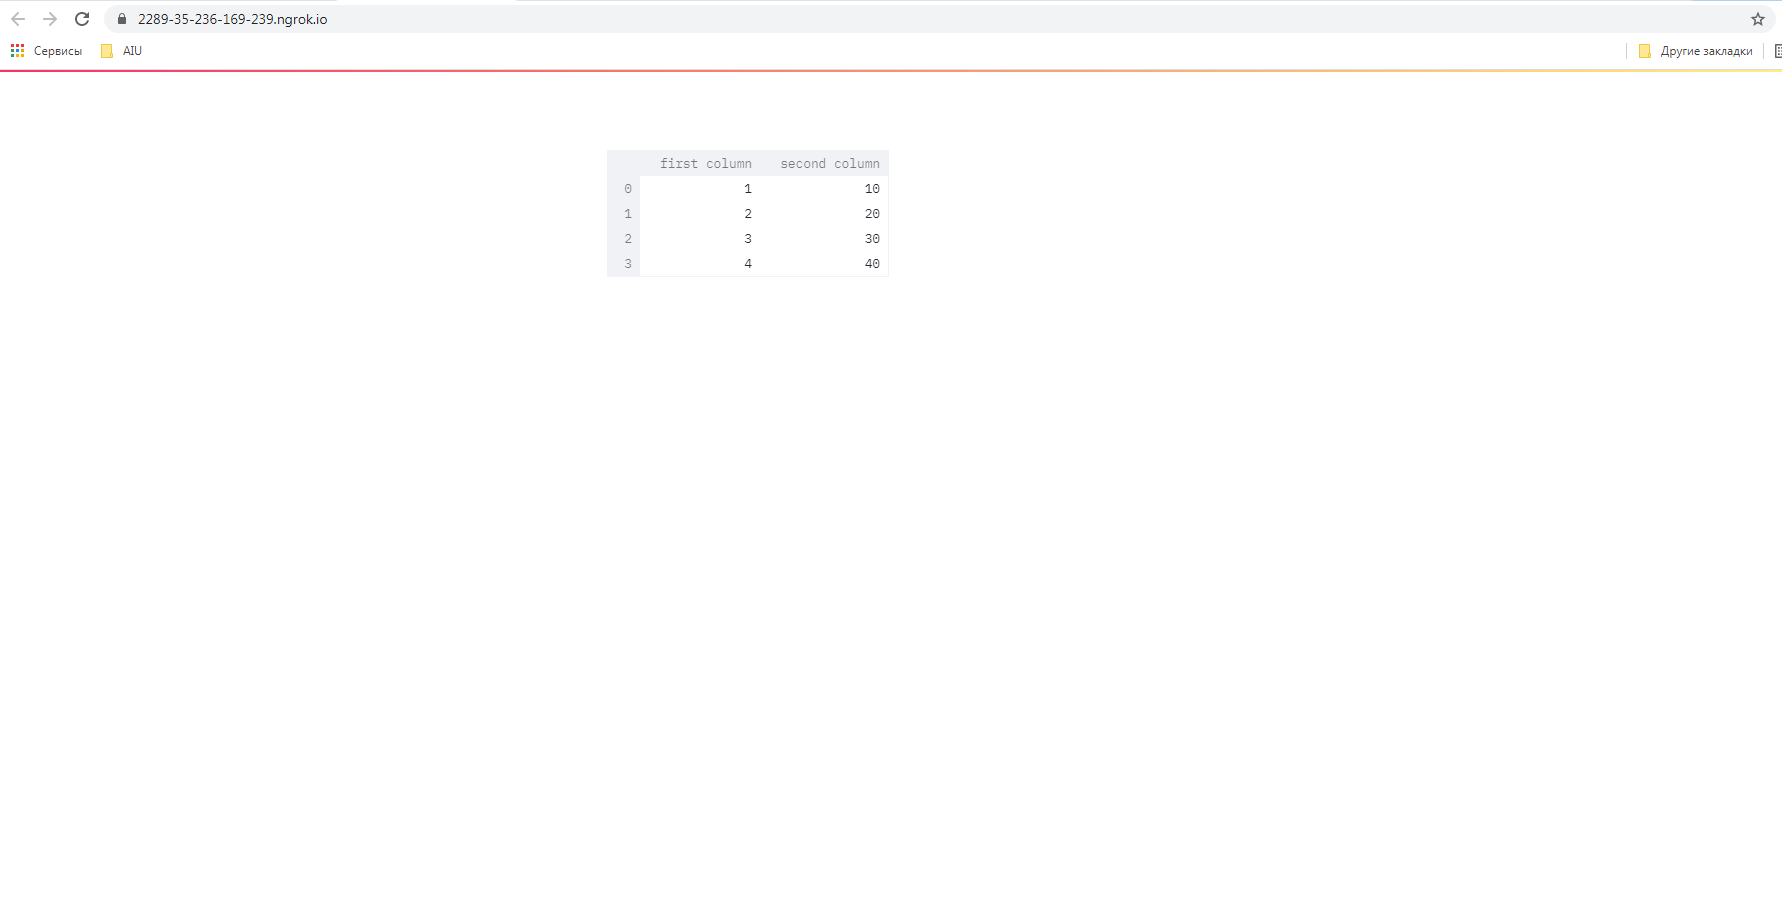

#### Отображение текста и данных

**Streamlit** поддерживает множество встроенных функций для форматирования текста.

**Основные:**

* `st.title('...')` - задание названия приложения;
* `st.header('...')`и `st.subheader('...')` - отображение заголовков разных уровней;
* `st.json('...')`- отображение объекта или строки в виде красиво оформленной структуры **JSON**;
* `st.text('...')` - простой текст, `st.markdown('...')` - текст с разметкой;
* `st.latex('...')` - математические выражения a формате **LaTeX**.

Далее показан пример вывода математического выражения:

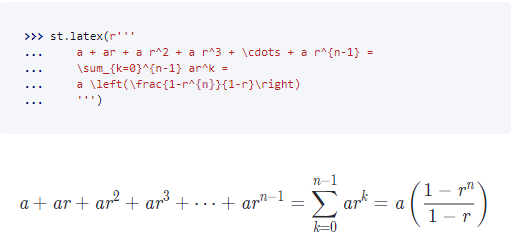

In [ ]:
code = '''
import streamlit as st
import numpy as np
import pandas as pd

st.latex(r'a + ar + a r^2 + a r^3 + \cdots + a r^{n-1} = \sum_{k=0}^{n-1} ar^k = a \left(\\frac{1-r^{n}}{1-r}\\right)')
'''

with open('helloworld.py', 'w') as f:
    f.write(code)

**Обратите внимание** на два момента при создании файла скрипта:
* дробь создается с помощью ключевой конструкции `\frac`, но если Вы укажете просто `\frac`, то в текстовом файле `\f` заменится на символ . Чтобы избежать подобной ситуации необходимо добавить еще один слеш
* аналогично и для случая создания закрывающей правой скобки с помощью ключевой конструкции `\right`. `\r` - это символ переноса строки, поэтому мы добавляем еще один слеш, чтобы избежать ошибок

Проверьте созданный текстовый файл скрипта, чтобы убедится в корректности созданной формулы

In [ ]:
get_link()

Ссылка для streamlit: http://4b12-35-196-74-211.ngrok.io


In [ ]:
!streamlit run helloworld.py

2022-04-03 21:53:42.792 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.196.74.211:8501

  Stopping...
^C


`st.write('...')` - в зависимости 
от добавленного аргумента отображает:

- `st.write(dict)` - словарь в интерактивном виджете;
- `st.write(keras)` - модель Keras;
- `st.write(func)` - информацию о функции ;
- `st.write(plotly_fig)` - фигуру **Plotly**;
- `st.write(data_frame)` - **DataFrame** как таблицу;
- ...



Ниже пример вывода таблицы **Pandas**:

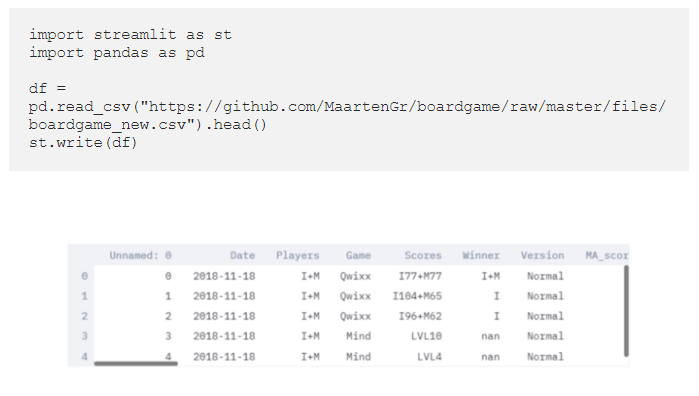

Подробнее в документации https://docs.streamlit.io/en/stable/api.html#.

#### Отображение диаграмм

* `st.line_chart(...)` - создание линейного графика;
* `st.area_chart(...)` - диаграмма с областями;
* `st.bar_chart(...)` - гистограмма;
* `st.pyplot(...)` - график модуля **pyplot** библиотеки **matplotlib**.

Ниже представлен пример вывода гистограммы с использованием **matplotlib**:

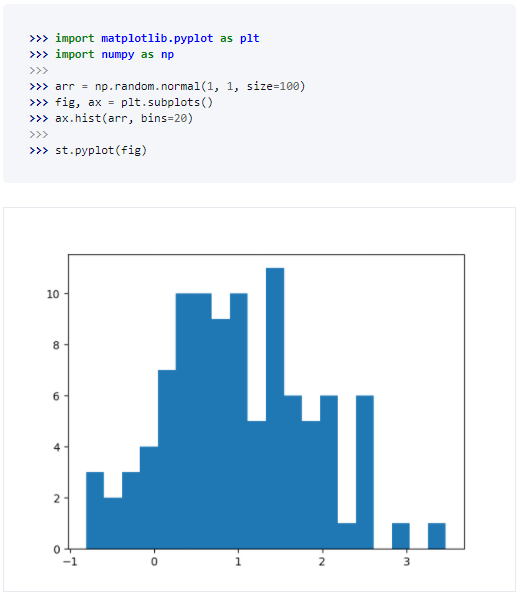

### Интерактивные элементы

С помощью виджетов **Streamlit** позволяет встроить взаимодействие с пользователем прямо в ваше приложение с помощью кнопок, ползунков, ввода текста и других элементов управления.

* `st.button()` - виджет кнопки;
* `st.checkbox()` - виджет флажка;
* `st.selectbox()` - виджет выбора;
* `st.radio()` - виджет с переключателем;
* `st.multiselect()` - виджет с множественным выбором, может запускаться со значениями по умолчанию.

Ниже приведен пример виджета с множественным выбором:

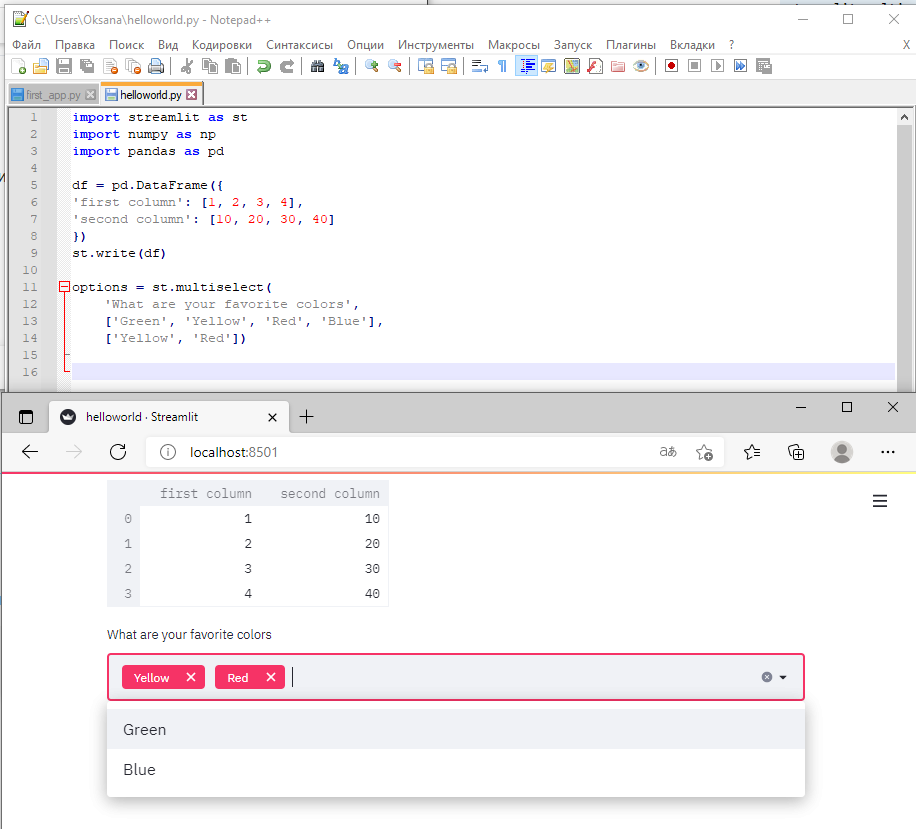

---

**Важно!** Вы можете не только добавить интерактивности в свой отчет с помощью виджетов, но и организовать их в виде боковой панели с помощью `st.sidebar.<element_name>`. 

---

Каждый переданный в `st.sidebar` элемент будет закреплен слева, что позволит удобнее организовать для пользователя содержимое вашего приложения. 

Для элементов `st.echo()` и `st.spinner()` добавление в боковую панель не поддерживается.

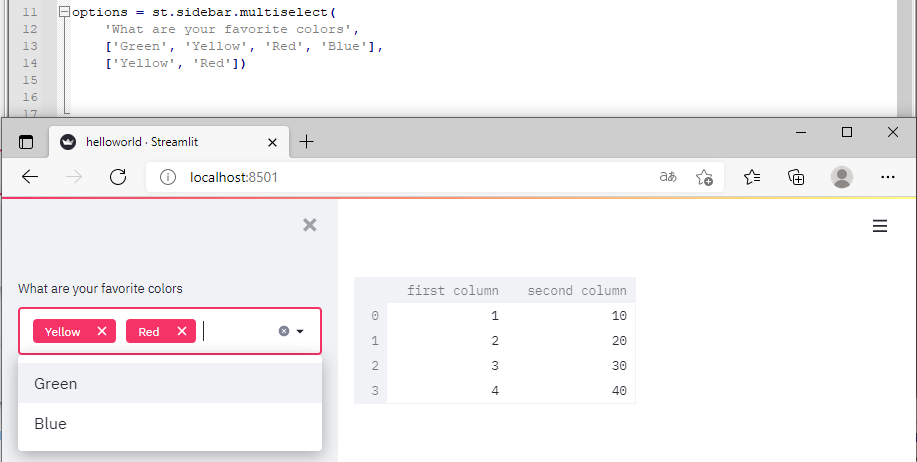

### Отображение прогресса и статуса

**Streamlit** предоставляет несколько методов для добавления анимаций в ваше приложение. Эти анимации включают индикаторы выполнения, сообщения о состоянии (например, предупреждения) и праздничные шары.

* `st.progress()` - индикатор выполнения;
* `st.error('This is an error')` - сообщение об ошибке;
* `st.balloons()` - праздничные воздушные шары.

Пример - праздничные шары:

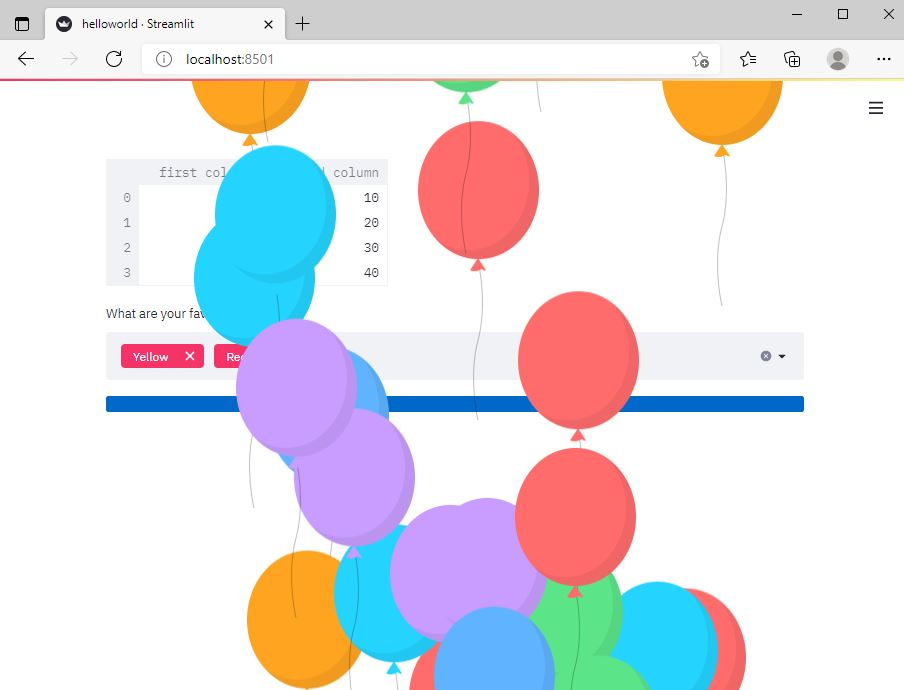

Пример - создание искусственной длительной операции и вывод индикатора выполнения для нее:
```
import time

st.write('Starting a long computation...')

# Add a placeholder
latest_iteration = st.empty()
bar = st.progress(0)

for i in range(100):
    # Update the progress bar with each iteration.
    latest_iteration.text(f'Iteration {i+1}')
    bar.progress(i + 1)
    time.sleep(0.1)
```

### Дополнительная информация

Мы разобрали базовый набор функций **Streamlit** для создания собственных приложений. Если вы столкнетесь с трудностями, вот несколько вещей, которые вы можете сделать:<br>
1. Посетите [форум сообщества](https://discuss.streamlit.io/) и задайте вопрос
2. Вызовите быструю справку из командной строки с помощью команды `streamlit --help`
3. Ознакомьтесь с [документацией](https://docs.streamlit.io/en/stable/api.html)
4. Ознакомьтесь с [примерами продвинутых приемов](https://docs.streamlit.io/en/stable/advanced_concepts.html)

## Использование библиотеки **Streamlit** на собственном компьютере

Для того, чтобы создавать веб-приложения на своей локальной машине, вам потребуется установить **Python** на свой компьютер.

Одим из самых простых способов является установка пакета **Anaconda**, включающего в себя все необходимые инструменты.

---
Дополнительная информация ([База знаний УИИ - «**Установка пакета "Anaconda"**»](https://colab.research.google.com/drive/18UhQBg_T3BcAhfQRkEBzpwznVlatdNpr?usp=sharing))

---

После установки пакета запустите командную строку Анаконды: **Anaconda Prompt**

А дальше вам потребуется выполнить те же шаги, что уже делались в рамках занятия:

1. Установка **Streamlit**:

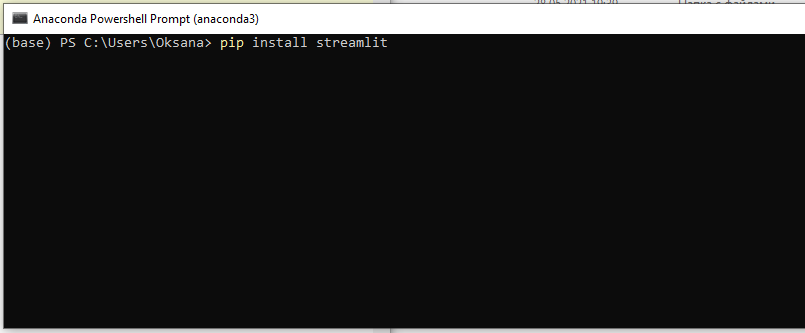

2. Проверка успешности установки:

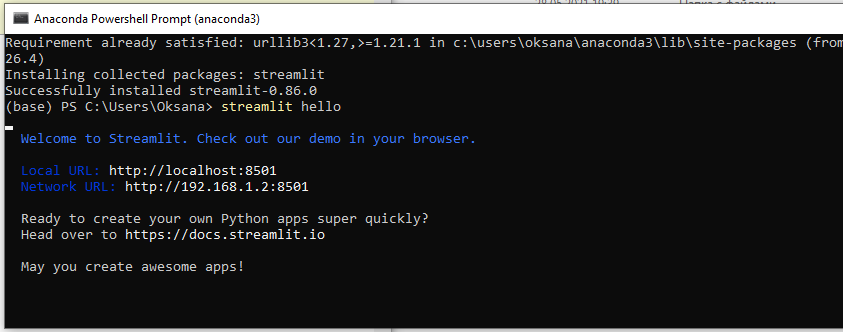

При работе на своем компьютере никакие туннели уже потребуются. Все, что нужно - это в новой вкладке браузера ввести: http://localhost:8501

После этого вы должны увидеть такую же страницу проверки:

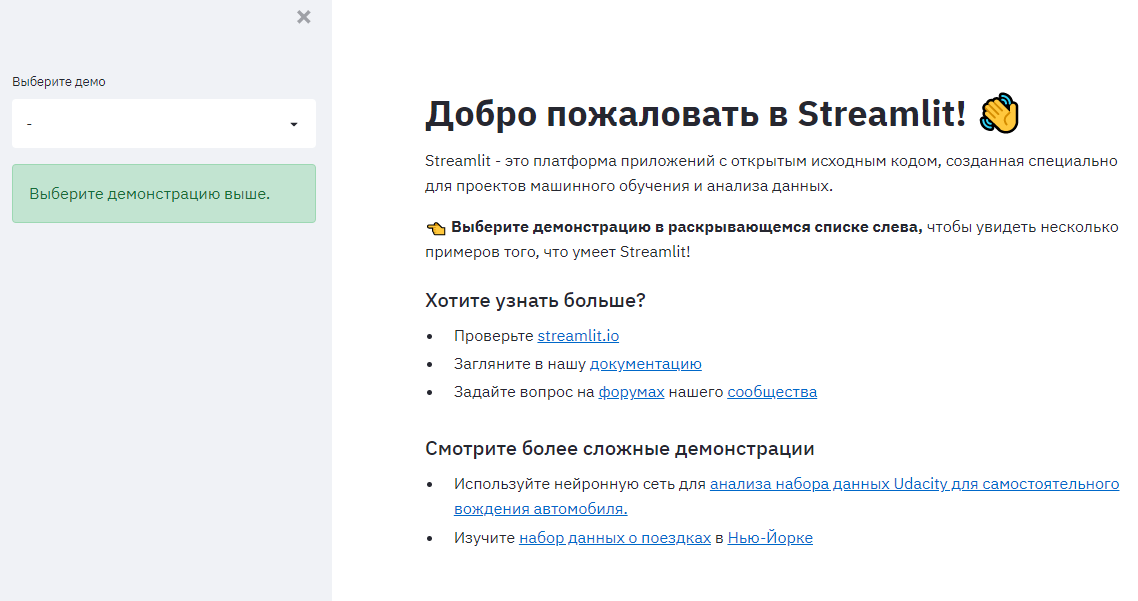

Вот и все :)

Теперь весь функционал библитеки **Streamlit** доступен для работы на вашем компьютере!

**Содержание**:

1. Библиотека streamlit
2. [Создание веб-сервера](https://colab.research.google.com/drive/1wapdcAadltay2dRHMTTjGBzq1sO2AFMU?usp=sharing)